In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from numpy.random import seed


# from tensorflow.python.keras.applications import vgg16
# from tensorflow.python.keras.applications.vgg16 import preprocess_input
# from tensorflow.python.keras.preprocessing.image import ImageDataGenerator, load_img
#from tensorflow.python.keras.callbacks import ModelCheckpoint
# from tensorflow.python.keras import layers, models, Model,optimizers

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import plot_confusion_matrix

#from tensorflow.keras import optimizers

#from keras.optimizers import Adam

from keras import optimizers



import keras
from sklearn import metrics
import tensorflow as tf
from keras.layers import Input, Lambda, Dense, Flatten,GlobalAveragePooling2D,BatchNormalization,Dropout,Activation
from keras.models import Model
# from keras.applications.densenet201 import DenseNet121
from keras.applications.vgg19 import VGG19
#from tensorflow.keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

# from tensorflow.keras import optimizers
# from tensorflow.keras.utils import to_categorical
# from tensorflow.keras.preprocessing.image import load_img, img_to_array
# from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

# from IPython.display import Image, display
# import matplotlib.pyplot as plt
# import matplotlib.cm as cm

# from sklearn.metrics import classification_report, log_loss, accuracy_score,confusion_matrix
# from sklearn.model_selection import train_test_split
# from IPython.display import Image

In [ ]:
train_data_dir = '/content/drive/My Drive/datasets_image/brain_conf/train' 
val_data_dir ='/content/drive/My Drive/datasets_image/brain_conf/validation'
test_data_dir = '/content/drive/My Drive/datasets_image/brain_conf/test'

In [ ]:
img_height, img_width = 224,224
conv_base =VGG19(weights='imagenet', include_top=False, pooling='max', input_shape = (img_width, img_height, 3))

80150528/80134624 [==============================] - 1s 0us/step


In [ ]:
for layer in conv_base.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f687336f3d0> True
<keras.layers.convolutional.Conv2D object at 0x7f6872ed9c90> True
<keras.layers.convolutional.Conv2D object at 0x7f6872f12850> True
<keras.layers.pooling.MaxPooling2D object at 0x7f68c35bac10> True
<keras.layers.convolutional.Conv2D object at 0x7f68704c5550> True
<keras.layers.convolutional.Conv2D object at 0x7f68704cd210> True
<keras.layers.pooling.MaxPooling2D object at 0x7f68704c5090> True
<keras.layers.convolutional.Conv2D object at 0x7f68704d1e10> True
<keras.layers.convolutional.Conv2D object at 0x7f68704d92d0> True
<keras.layers.convolutional.Conv2D object at 0x7f68704d96d0> True
<keras.layers.convolutional.Conv2D object at 0x7f68704d1250> True
<keras.layers.pooling.MaxPooling2D object at 0x7f68704e7dd0> True
<keras.layers.convolutional.Conv2D object at 0x7f68704ec5d0> True
<keras.layers.convolutional.Conv2D object at 0x7f68704ea250> True
<keras.layers.convolutional.Conv2D object at 0x7f68704f3d90> True
<keras.l

Text(0.5, 1.0, 'Number of training images per category:')

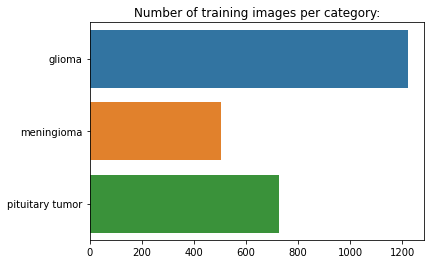

In [ ]:
category_names = sorted(os.listdir(train_data_dir))
nb_categories = len(category_names)
img_pr_cat = []
for category in category_names:
    folder = train_data_dir + '/' + category
    img_pr_cat.append(len(os.listdir(folder)))
sns.barplot(y=category_names, x=img_pr_cat).set_title("Number of training images per category:")

In [ ]:
model = Sequential()
model.add(conv_base)
model.add(Dense(nb_categories, activation='softmax'))
model.summary()


# for layer in conv_base.layers:
#   layer.trainable = False
  

  

# #folders = glob('/content/drive/My Drive/datasets_image/brain_tumor/train/*')
  


# x = Flatten()(conv_base.output)

# prediction = Dense(nb_categories, activation='softmax')(x)

# model = Model(inputs=conv_base.input, outputs=prediction)


# model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 512)               20024384  
_________________________________________________________________
dense (Dense)                (None, 3)                 1539      
Total params: 20,025,923
Trainable params: 20,025,923
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Number of images to load at each iteration
batch_size = 32
# only rescaling
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        zoom_range=0.1,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=False,
        brightness_range = (0.9,1.1),
        fill_mode='nearest'
        )
test_datagen =  ImageDataGenerator(
    rescale=1./255
)

In [ ]:
print('Total number of images for "training":')
train_generator = train_datagen.flow_from_directory(
train_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size, 
class_mode = "categorical")
print('Total number of images for "validation":')
val_generator = test_datagen.flow_from_directory(
val_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size,
class_mode = "categorical",
shuffle=False)
print('Total number of images for "testing":')
test_generator = test_datagen.flow_from_directory(
test_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size,
class_mode = "categorical",
shuffle=False)

Total number of images for "training":
Found 2458 images belonging to 3 classes.
Total number of images for "validation":
Found 303 images belonging to 3 classes.
Total number of images for "testing":
Found 303 images belonging to 3 classes.


In [ ]:
learning_rate = .00001
epochs =100
#checkpoint = ModelCheckpoint("sign_classifier.h5", monitor = 'val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
model.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), metrics = ['acc','AUC'])




In [ ]:
history = model.fit_generator(train_generator, 
                              epochs=epochs, 
                              shuffle=True, 
                              validation_data=val_generator
                              #callbacks=[checkpoint]
                              )

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
77/77 [==============================] - 623s 8s/step - loss: 0.6488 - acc: 0.7213 - auc: 0.8873 - val_loss: 0.3909 - val_acc: 0.8350 - val_auc: 0.9634
Epoch 2/100
77/77 [==============================] - 93s 1s/step - loss: 0.2663 - acc: 0.9020 - auc: 0.9807 - val_loss: 0.2960 - val_acc: 0.8845 - val_auc: 0.9742
Epoch 3/100
77/77 [==============================] - 92s 1s/step - loss: 0.1581 - acc: 0.9402 - auc: 0.9932 - val_loss: 0.1910 - val_acc: 0.9142 - val_auc: 0.9898
Epoch 4/100
77/77 [==============================] - 91s 1s/step - loss: 0.1225 - acc: 0.9585 - auc: 0.9955 - val_loss: 0.2214 - val_acc: 0.9142 - val_auc: 0.9866
Epoch 5/100
77/77 [==============================] - 91s 1s/step - loss: 0.0699 - acc: 0.9764 - auc: 0.9986 - val_loss: 0.2573 - val_acc: 0.8977 - val_auc: 0.9848
Epoch 6/100
77/77 [==============================] - 91s 1s/step - loss: 0.0666 - acc: 0.9736 - auc: 0.9988 - val_loss: 0.1840 - val_acc: 0.9142 - val_auc: 0.9916
Epoch 7/100
77/77 [==

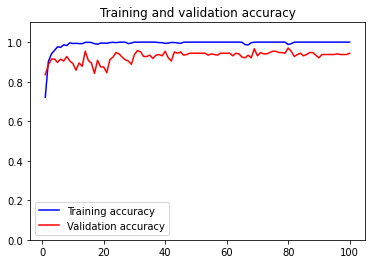

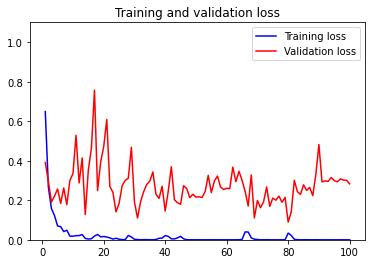

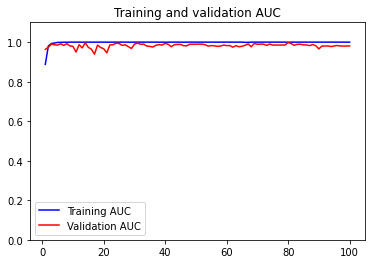

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
AUC = history.history['auc']
val_AUC = history.history['val_auc']

epochs = range(1,len(acc)+1)

plt.figure()
plt.plot(epochs, acc, 'b', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.ylim([0, 1.1])
plt.savefig('Accuracy.png')

plt.figure()
plt.plot(epochs, loss, 'b', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.ylim([0, 1.1])
plt.savefig('Loss.png')

plt.figure()
plt.plot(epochs, AUC, 'b', label = 'Training AUC')
plt.plot(epochs, val_AUC, 'r', label='Validation AUC')
plt.title('Training and validation AUC')
plt.legend()
plt.ylim([0, 1.1])
plt.savefig('AUC.png')


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes, figname,
 normalize=False,
 title='Confusion matrix',
 cmap=plt.cm.Blues):
#  “””
#  This function prints and plots the confusion matrix.
#  Normalization can be applied by setting `normalize=True`.
#  “””
 import numpy as np
 import matplotlib.pyplot as plt
 import itertools
 if normalize:
  cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
  print('Normalized confusion matrix')
 else:
  print('Confusion matrix, without normalization')
  
 plt.figure(figsize=(8,8))
 plt.imshow(cm, interpolation='nearest', cmap=cmap)
 plt.title(title)
 #plt.colorbar()
 tick_marks = np.arange(len(classes))
 plt.xticks(tick_marks, classes, rotation=90)
 plt.yticks(tick_marks, classes)
 fmt = '.2f' if normalize else 'd'
 thresh = cm.max() / 2.
 for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, format(cm[i, j], fmt),
  horizontalalignment='center',
  color='white' if cm[i, j] > thresh else 'black')
 plt.ylabel('True label')
 plt.xlabel('Predicted label')
 plt.tight_layout()
 plt.savefig(figname)

In [ ]:
Y_pred = model.predict_generator(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

cm = confusion_matrix(test_generator.classes, y_pred)
#plot_confusion_matrix(cm, labels = category_names, title='Confusion Matrix', normalize=False, figname = 'Confusion_matrix_concrete.jpg')
#plot_confusion_matrix(cm, labels = category_names,  normalize=False)#, figname = 'Confusion_matrix_concrete.jpg', title='Confusion Matrix'

#plot_confusion_matrix(X = test_generator.classes, y_true = y_pred,labels= category_names, normalize=False)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [ ]:
print(cm)

[[101   0   0]
 [ 10  81  10]
 [  3   0  98]]


In [ ]:
accuracy = accuracy_score(test_generator.classes, y_pred)
print("Accuracy in test set: %0.1f%% " % (accuracy * 100))

Accuracy in test set: 92.4% 


In [ ]:
confusion_metri=metrics.classification_report(test_generator.classes, y_pred,target_names=category_names)
print(confusion_metri)

                 precision    recall  f1-score   support

         glioma       0.89      1.00      0.94       101
     meningioma       1.00      0.80      0.89       101
pituitary tumor       0.91      0.97      0.94       101

       accuracy                           0.92       303
      macro avg       0.93      0.92      0.92       303
   weighted avg       0.93      0.92      0.92       303



In [ ]:
def read_image(file_path):
   print('[INFO] loading and preprocessing image…') 
   image = load_img(file_path, target_size=(224, 224)) 
   image = img_to_array(image) 
   image = np.expand_dims(image, axis=0)
   image /= 255. 
   return image
def test_single_image(path):
  animals = category_names
  
  images = read_image(path)

  # bt_prediction = model.predict(images) 
  # preds = model.predict_proba(bt_prediction)

  preds = model.predict_generator(images)

  bar_animal=[]
  bar_prob=[]

  for idx, animal, x in zip(range(0,3), animals , preds[0]):
    print('ID: {}, Label: {} {}%'.format(idx, animal, round(x*100,3) ))

    bar_animal=animal
    bar_prob=round(x*100,3)
    print(idx,animal)

    plt.bar(bar_animal,bar_prob)

  print('Final Decision:')
  
  #print(bar_animal)
  
  


  for x in range(3):
   print('.'*(x+1))
   
  # class_predicted = model.predict_classes(bt_prediction)
  # class_dictionary = generator_top.class_indices 
  # inv_map = {v: k for k, v in class_dictionary.items()} 
  # print('ID: {}, Label: {}'.format(class_predicted[0],  inv_map[class_predicted[0]])) 
  return load_img(path)


In [ ]:
# from keras.preprocessing.image import load_img, img_to_array

# path = '/content/drive/My Drive/datasets_image/brain_tumor/train/2/96.png'
# #path='/content/drive/My Drive/cats_and_dogs/test/dog/dog.232.jpg'
# test_single_image(path)

In [ ]:
# def get_img_array(img_path, size):
#     # `img` is a PIL image of size 299x299
#     img = keras.preprocessing.image.load_img(img_path, target_size=size)
#     # `array` is a float32 Numpy array of shape (299, 299, 3)
#     array = keras.preprocessing.image.img_to_array(img)
#     # We add a dimension to transform our array into a "batch"
#     # of size (1, 299, 299, 3)
#     array = np.expand_dims(array, axis=0)
#     return array


# def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
#     # First, we create a model that maps the input image to the activations
#     # of the last conv layer as well as the output predictions
#     grad_model = tf.keras.models.Model(
#         [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
#     )

#     # Then, we compute the gradient of the top predicted class for our input image
#     # with respect to the activations of the last conv layer
#     with tf.GradientTape() as tape:
#         last_conv_layer_output, preds = grad_model(img_array)
#         if pred_index is None:
#             pred_index = tf.argmax(preds[0])
#         class_channel = preds[:, pred_index]

#     # This is the gradient of the output neuron (top predicted or chosen)
#     # with regard to the output feature map of the last conv layer
#     grads = tape.gradient(class_channel, last_conv_layer_output)

#     # This is a vector where each entry is the mean intensity of the gradient
#     # over a specific feature map channel
#     pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

#     # We multiply each channel in the feature map array
#     # by "how important this channel is" with regard to the top predicted class
#     # then sum all the channels to obtain the heatmap class activation
#     last_conv_layer_output = last_conv_layer_output[0]
#     heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
#     heatmap = tf.squeeze(heatmap)

#     # For visualization purpose, we will also normalize the heatmap between 0 & 1
#     heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
#     return heatmap.numpy()

In [ ]:
# img_size=[224,224]
# # Prepare image
# img_array = preprocess_input(get_img_array(path, size=img_size))

# # Make model
# model = model

# # # Remove last layer's softmax
# # model.layers[-1].activation = None

# # # Print what the top predicted class is
# # preds = model.predict(img_array)
# # print("Predicted:", decode_predictions(preds, top=1)[0])

# # Generate class activation heatmap
# heatmap = make_gradcam_heatmap(img_array, model, "block5_conv4")

# # Display heatmap
# plt.matshow(heatmap)
# plt.show()

In [ ]:

# # We load the original image
# img = keras.preprocessing.image.load_img(path)
# img = keras.preprocessing.image.img_to_array(img)

# # We rescale heatmap to a range 0-255
# heatmap = np.uint8(255 * heatmap)

# # We use jet colormap to colorize heatmap
# jet = cm.get_cmap("jet")

# # We use RGB values of the colormap
# jet_colors = jet(np.arange(256))[:, :3]
# jet_heatmap = jet_colors[heatmap]

# # We create an image with RGB colorized heatmap
# jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
# jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
# jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

# # Superimpose the heatmap on original image
# superimposed_img = jet_heatmap * 0.3 + img
# superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

# # Save the superimposed image
# save_path = '/content/drive/My Drive/cats_and_dogs/test/dogtest1.jpg'
# superimposed_img.save(save_path)

# # Display Grad CAM
# display(Image(save_path))

# plt.imshow(superimposed_img)

In [ ]:
model.save('/content/drive/My Drive/datasets_image/brain_conf/res/final/model_final.h5' )

In [ ]:
model.save_weights('/content/drive/My Drive/datasets_image/brain_conf/res/final/model_weights_final.h5' )

In [ ]:
# print([layer.name for layer in model.get_layer('vgg19').layers])